In [138]:
!pip install h3 geojson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import pairwise_distances
# from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, KMeans
from copy import deepcopy

import seaborn as sns
import folium
from tqdm.auto import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import h3
from shapely.geometry import Polygon
from geojson import Feature, Point, FeatureCollection, Polygon
import plotly.express as px
from tqdm import tqdm

In [74]:
df = pd.read_csv('locs_emb.csv', index_col=False)

In [75]:
df_train = df[:]

In [76]:
hexagones = df_train.pop('h3_cell')

In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [81]:
for n_clusters in [2,3,4,5,6,7, 8, 9]:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_train)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_train, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.8428260660975195)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.8013917333341838)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.7955683961234915)
For n_clusters = 5, silhouette score is 0.7330776542002793)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.7336764660112034)
For n_clusters = 7, silhouette score is 0.7263475722023135)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.730402466515386)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, silhouette score is 0.6728071983845388)


In [83]:
distortions = []

K = range(1,20)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0, n_init = 50, max_iter = 500)
    kmean.fit(df_train)
    distortions.append(kmean.inertia_)

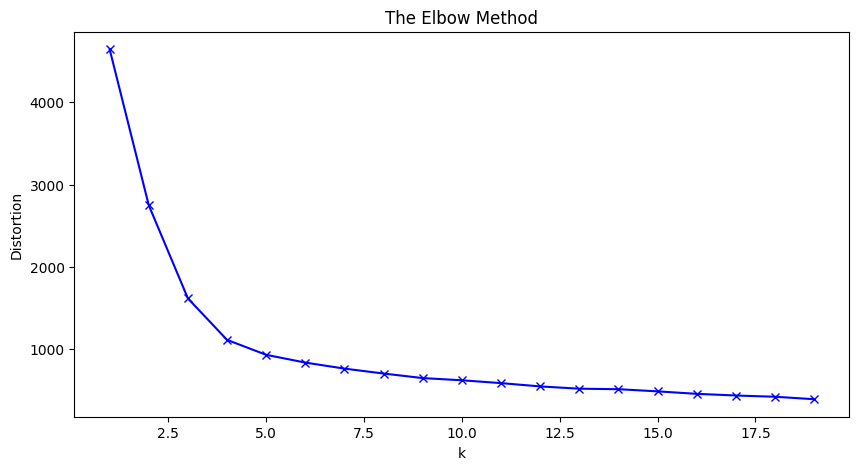

In [84]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [85]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_train)

hexagones['cluster'] = kmeans.labels_
hexagones.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-85-185899fb31a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagones['cluster'] = kmeans.labels_


0    89118108823ffff
1    8911810882bffff
2    8911810882fffff
3    8911810884fffff
4    8911810886fffff
Name: h3_cell, dtype: object

In [86]:
type(hexagones)

pandas.core.series.Series

In [87]:
pca = PCA().fit(df_train)
pca_types = pca.transform(df_train)
print("Variance explained by each component (%): ")
for i in range(len(pca.explained_variance_ratio_)):
      print("\n",i+1,"º:", pca.explained_variance_ratio_[i]*100)
print("Total sum (%): ",sum(pca.explained_variance_ratio_)*100)
print("Explained variance of the first two components (%): ",sum(pca.explained_variance_ratio_[0:1])*100)

Variance explained by each component (%): 

 1 º: 57.38868168276077

 2 º: 28.115566875781035

 3 º: 3.8008560537837313

 4 º: 2.3636681264470747

 5 º: 1.4332526096328413

 6 º: 0.8303365086684531

 7 º: 0.7450827639964366

 8 º: 0.6052546987422984

 9 º: 0.5121961957207161

 10 º: 0.4693754744042584

 11 º: 0.42946005260290016

 12 º: 0.37377323496355486

 13 º: 0.3294337929228079

 14 º: 0.27357156267084615

 15 º: 0.24696520623742063

 16 º: 0.23428544293289627

 17 º: 0.18536442925231897

 18 º: 0.154238981507002

 19 º: 0.1477971106741759

 20 º: 0.14057171475739266

 21 º: 0.11294169150970548

 22 º: 0.10401774599059714

 23 º: 0.08987417031279488

 24 º: 0.08944534113050197

 25 º: 0.0838860920176207

 26 º: 0.07166291282198446

 27 º: 0.06397480641328533

 28 º: 0.053412709456722135

 29 º: 0.04899974360019775

 30 º: 0.044038818061971116

 31 º: 0.041503901747503354

 32 º: 0.03657690912271739

 33 º: 0.03260932373931329

 34 º: 0.030505395722140977

 35 º: 0.0289070754524111

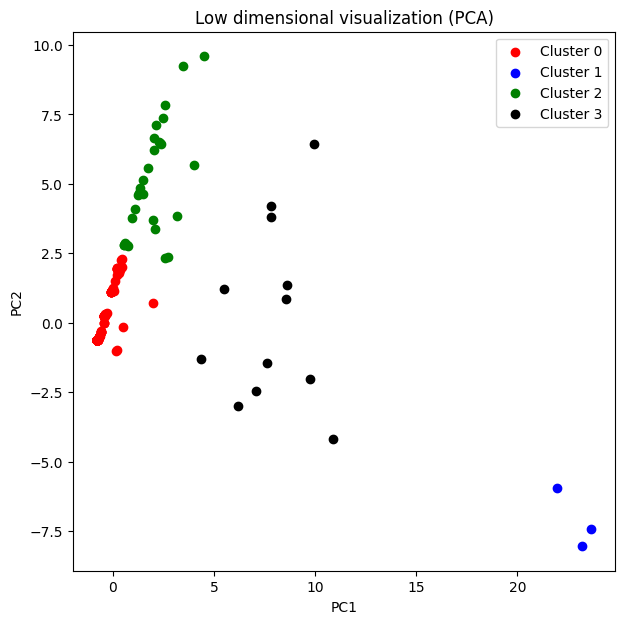

In [88]:
c0 = []
c1 = []
c2 = []
c3 = []

for i in range(len(pca_types)):
    if kmeans.labels_[i] == 0:
        c0.append(pca_types[i])
    if kmeans.labels_[i] == 1:
        c1.append(pca_types[i])
    if kmeans.labels_[i] == 2:
        c2.append(pca_types[i])
    if kmeans.labels_[i] == 3:
        c3.append(pca_types[i])
        
        
c0 = np.array(c0)
c1 = np.array(c1)
c2 = np.array(c2)
c3 = np.array(c3)

plt.figure(figsize=(7,7))
plt.scatter(c0[:,0], c0[:,1], c='red', label='Cluster 0')
plt.scatter(c1[:,0], c1[:,1], c='blue', label='Cluster 1')
plt.scatter(c2[:,0], c2[:,1], c='green', label='Cluster 2')
plt.scatter(c3[:,0], c3[:,1], c='black', label='Cluster 3')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Low dimensional visualization (PCA)');

In [89]:
df['cluster']  = kmeans.labels_

df.head()

,h3_cell,parking,bench,waste_disposal,waste_basket,kindergarten,cafe,school,pharmacy,atm,...,community_centre,monastery,kiosk,convenience,yes,mall,ticket,supermarket,newsagent,cluster
0,89118108823ffff,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8911810882bffff,2,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,8911810882fffff,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8911810884fffff,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8911810886fffff,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
df.groupby('cluster').mean()

<ipython-input-90-de1c4842ceee>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster').mean()


,parking,bench,waste_disposal,waste_basket,kindergarten,cafe,school,pharmacy,atm,bank,...,studio,community_centre,monastery,kiosk,convenience,yes,mall,ticket,supermarket,newsagent
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.260997,0.014663,0.082111,0.005865,0.008798,0.011730,0.023460,0.005865,0.014663,0.000000,...,0.000000,0.000000,0.002933,0.008798,0.058651,0.008798,0.005865,0.002933,0.011730,0.000000
1,2.333333,24.333333,1.333333,0.000000,0.666667,0.666667,0.333333,1.000000,0.333333,1.000000,...,0.000000,0.333333,0.000000,0.666667,0.666667,0.000000,0.000000,0.000000,1.000000,0.333333
2,5.793103,0.379310,2.137931,0.206897,0.551724,0.206897,0.103448,0.206897,0.241379,0.103448,...,0.034483,0.000000,0.000000,0.379310,0.517241,0.000000,0.241379,0.000000,0.448276,0.000000
3,3.416667,7.500000,1.833333,1.500000,0.416667,0.333333,0.250000,0.333333,0.083333,0.416667,...,0.000000,0.000000,0.000000,0.250000,1.333333,0.000000,0.000000,0.083333,0.166667,0.000000


In [91]:
df.columns

Index(['h3_cell', 'parking', 'bench', 'waste_disposal', 'waste_basket',
       'kindergarten', 'cafe', 'school', 'pharmacy', 'atm', 'bank',
       'place_of_worship', 'car_wash', 'fuel', 'fast_food', 'post_office',
       'taxi', 'clinic', 'fountain', 'recycling', 'restaurant',
       'bicycle_parking', 'payment_terminal', 'toilets', 'library', 'police',
       'telephone', 'college', 'fire_station', 'bus_station', 'university',
       'veterinary', 'hospital', 'cinema', 'parking_entrance', 'music_school',
       'parcel_locker', 'customs', 'social_facility', 'townhall', 'training',
       'pub', 'vending_machine', 'doctors', 'hunting_stand', 'bar',
       'driving_school', 'drinking_water', 'compressed_air', 'courthouse',
       'dentist', 'theatre', 'post_box', 'studio', 'community_centre',
       'monastery', 'kiosk', 'convenience', 'yes', 'mall', 'ticket',
       'supermarket', 'newsagent', 'cluster'],
      dtype='object')

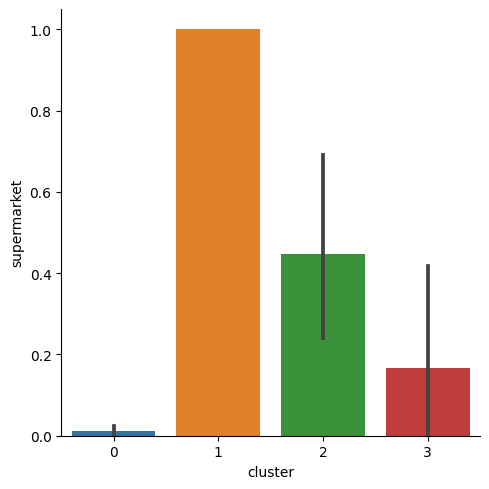

In [94]:
sns.catplot(x='cluster', y='supermarket', data=df, kind='bar');

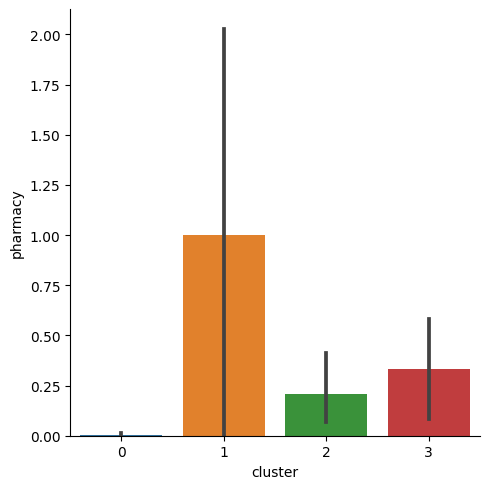

In [95]:
sns.catplot(x='cluster', y='pharmacy', data=df, kind='bar');

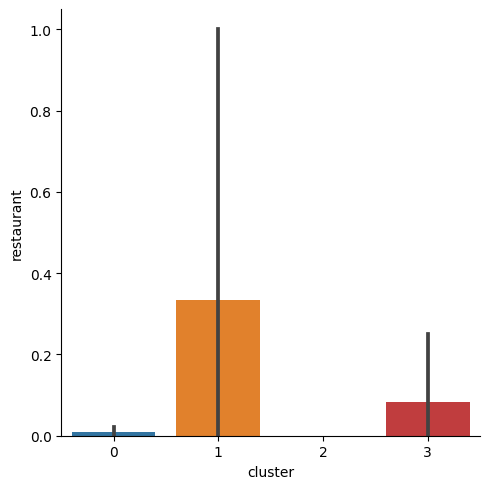

In [96]:
sns.catplot(x='cluster', y='restaurant', data=df, kind='bar');

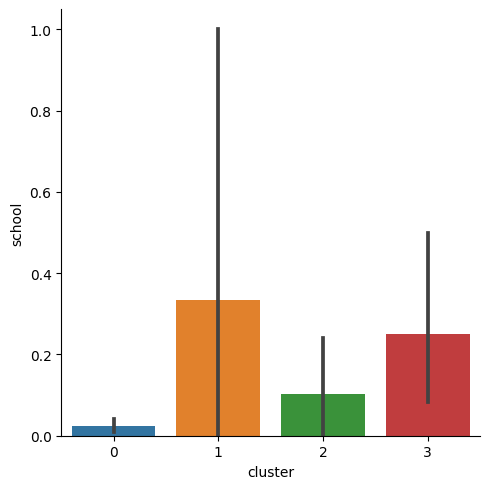

In [97]:
sns.catplot(x='cluster', y='school', data=df, kind='bar');

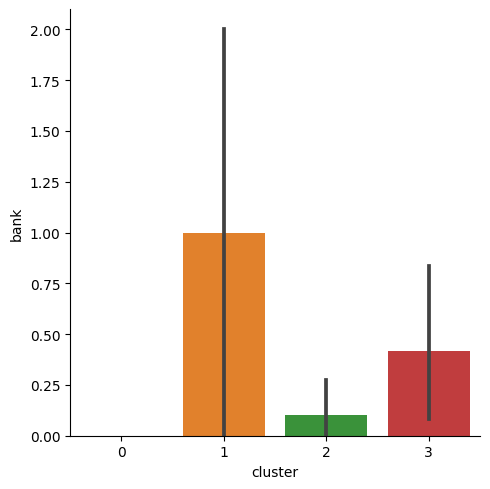

In [98]:
sns.catplot(x='cluster', y='bank', data=df, kind='bar');

In [166]:
latitude = 54.886280
longitude = 38.078237

map = folium.Map(location=[latitude, longitude], zoom_start=14)

In [108]:
map

In [109]:
def add_geometry(row):
  points = h3.h3_to_geo_boundary(row['h3_cell'], True)
  return Polygon(points)

In [121]:
df['geometry'] = (df.progress_apply(add_geometry, axis=1))

  0%|          | 0/385 [00:00<?, ?it/s]

In [143]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 44.2 MB/s eta 0:00:00


In [144]:
import geopandas

In [145]:
gdf = geopandas.GeoDataFrame(df)

In [146]:
gdf['geometry'] = gdf['geometry'].centroid

In [148]:
gdf['lon'] = gdf.geometry.x
gdf['lat'] = gdf.geometry.y

In [152]:
gdf

,h3_cell,parking,bench,waste_disposal,waste_basket,kindergarten,cafe,school,pharmacy,atm,...,convenience,yes,mall,ticket,supermarket,newsagent,cluster,geometry,lon,lat
0,89118108823ffff,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,POINT (38.02825 54.91143),38.028252,54.911425
1,8911810882bffff,2,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,POINT (38.03021 54.90853),38.030211,54.908530
2,8911810882fffff,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,POINT (38.03331 54.91109),38.033312,54.911094
3,8911810884fffff,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,POINT (38.02287 54.89794),38.022871,54.897940
4,8911810886fffff,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,POINT (38.03413 54.90274),38.034129,54.902738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,89118173507ffff,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,POINT (38.09657 54.84602),38.096575,54.846023
381,89118173523ffff,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,POINT (38.10473 54.84825),38.104732,54.848250
382,8911817352bffff,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,POINT (38.10668 54.84535),38.106684,54.845352
383,89118173533ffff,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,POINT (38.09968 54.84859),38.099677,54.848586


In [154]:
df1 = pd.read_csv('locations.csv', index_col=False)

<ipython-input-154-ef72b5ecff16>:1: DtypeWarning: Columns (8,10,11,12,18,19,22,23,24,25,26,27,28,29,30,31,32,33,40,44,45,46,47,48,49,50,51,52,54,55,56,57,58,59,60,61,62,63,64,65,67,68,69,70,71,72,74,75,76,77,78,79,80,81,82,83,84,85,86,87,89,91,92,93,94,96,97,98,99,100,102,104,105,106,108,109,110,111,112,113,114,115,116,117,118,119,120,122,123,124,125,126,127,128,129,130,131,132,133,136,138,139,140,141,146,147,148,169,171,172,173,174,175,176,177,178,179,180,181,182,184,185,186,187,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,214,215,216,217,218,219,221,222,223,224,225,226,227,228,229,230,232) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('locations.csv', index_col=False)


In [159]:
df_g = (df1
          .groupby('h3_cell')
          .osmid
          .agg(list)
          .to_frame("ids")
          .reset_index())
# Let's count each points inside the hexagon
df_g['count'] =(df_g['ids']
                      .apply(lambda df_ids:len(df_ids)))
df_g.sort_values('count',ascending=False)
df_g

,h3_cell,ids,count
0,89118108823ffff,"[405850109, 405993831, 405993832, 405993833, 4...",5
1,8911810882bffff,"[4369350408, 405563422, 405563432, 405563437, ...",26
2,8911810882fffff,"[405850143, 405850144, 405850145, 405850146, 4...",13
3,8911810884fffff,"[109731070, 109731077, 406193982, 406193983, 4...",20
4,8911810886fffff,"[405886895, 405886896, 406864265, 406864278, 4...",6
...,...,...,...
380,89118173507ffff,[367350409],1
381,89118173523ffff,"[162007278, 540141582, 540141589, 540141603, 5...",6
382,8911817352bffff,"[540141585, 540141587, 540141592, 540141598, 5...",6
383,89118173533ffff,"[7097956616, 540141597, 540141600]",3


In [160]:
df3 = pd.merge(gdf, df_g, left_on='h3_cell', right_on='h3_cell')

In [163]:
df3['cluster']

0      0
1      0
2      0
3      0
4      0
      ..
380    0
381    0
382    0
383    0
384    0
Name: cluster, Length: 385, dtype: int32

In [164]:
occurences = folium.map.FeatureGroup()
n_mean = df3['count'].mean()

for lat, lng, number in zip(df3['lat'],
                                         df3['lon'],
                                         df3['count']):
    occurences.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=number/n_mean*5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            tooltip = str(number)
        )
    )

map.add_child(occurences)

In [167]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, cluster in zip(df3['lat'], df3['lon'],  
                                            df3['cluster']):
    #label = folium.Popup(str(city)+ ','+str(state) + '- Cluster ' + str(cluster), parse_html=True)
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        tooltip = '- Cluster ' + str(cluster),
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters